# **Breast Cancer Detection using Machine Learning**

****

1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Loading the Dataset

In [3]:
cancer_dataset = pd.read_csv('breast-cancer-dataset.csv')
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Preprocessing**

****

3. Separating the outcome i.e diagnosis from the features and storing the features in X and outcome in Y

In [4]:
# Removing the last column since it's of no use
cancer_dataset = cancer_dataset.iloc[:,0:32]

X = cancer_dataset.iloc[:,0:32]
X = X.drop(['diagnosis'], axis=1)

Y = cancer_dataset['diagnosis']
Y = pd.DataFrame(Y)

In [5]:
# Determing the Dimensions of the dataset using panda dataset 'shape' attribute
print(cancer_dataset.shape)

(569, 32)


In [6]:
# Determining the count of the patients whether M = malignant or B = benign
cancer_dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

4. Plotting the histogram of every feature of Benign and malignant

diagnosis
B    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
M    [[Axes(0.125,0.777333;0.103333x0.102667), Axes...
dtype: object

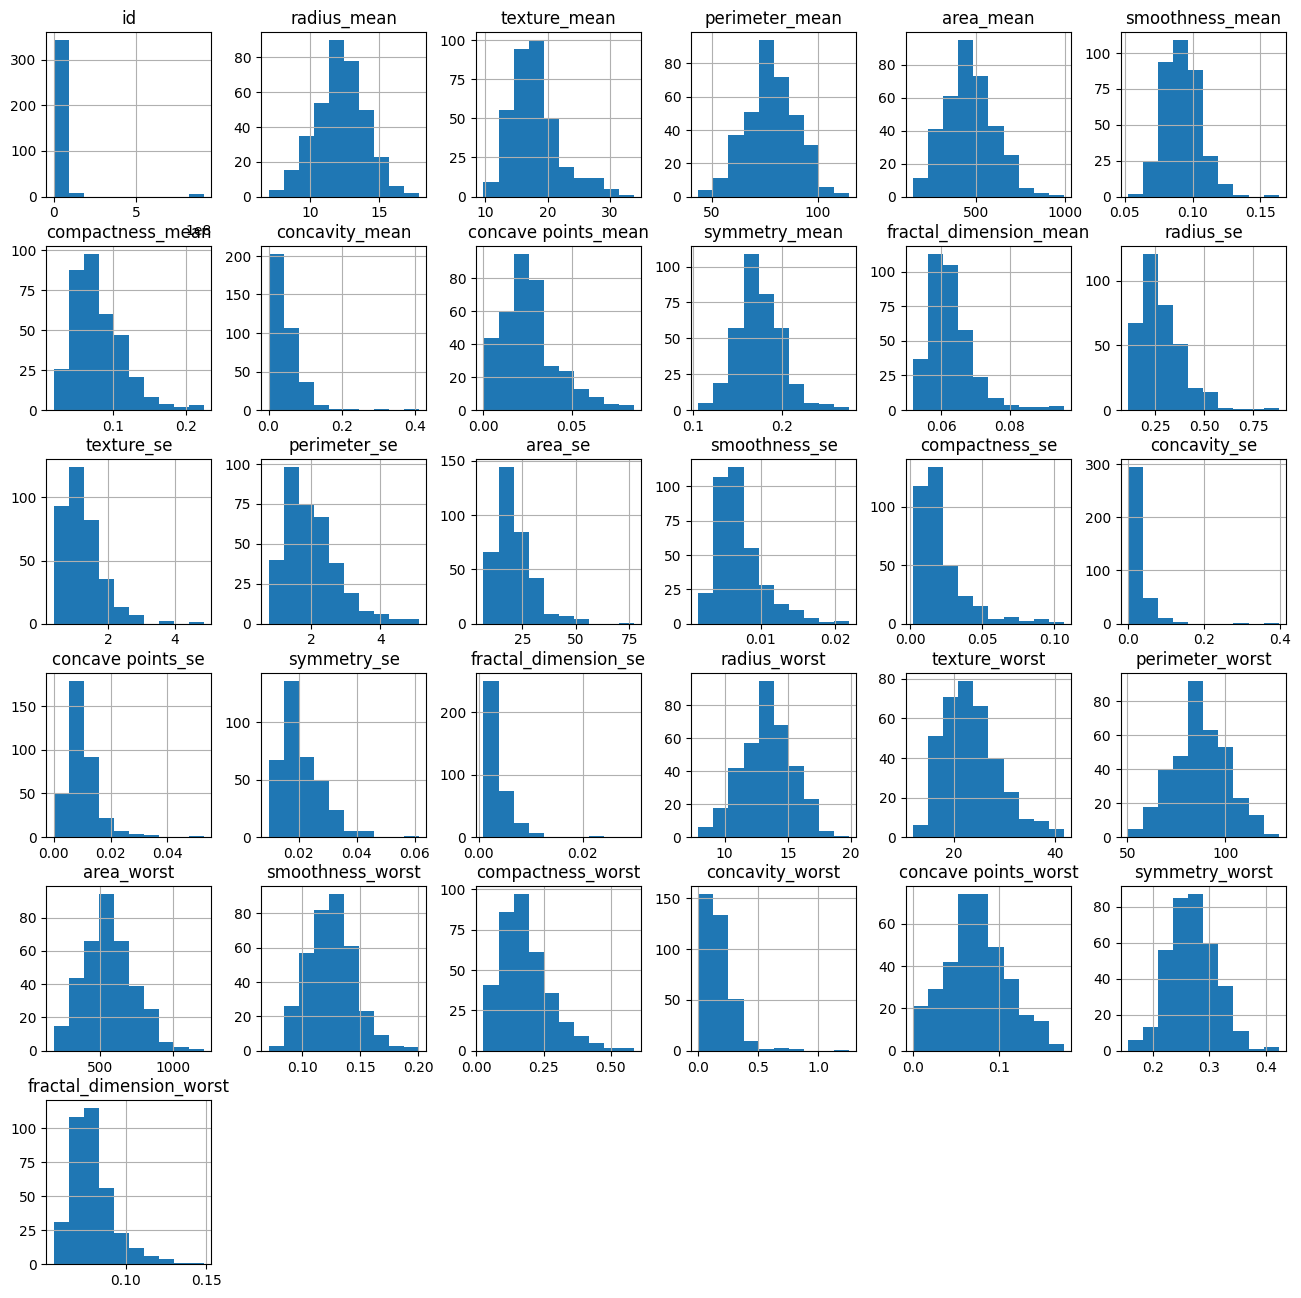

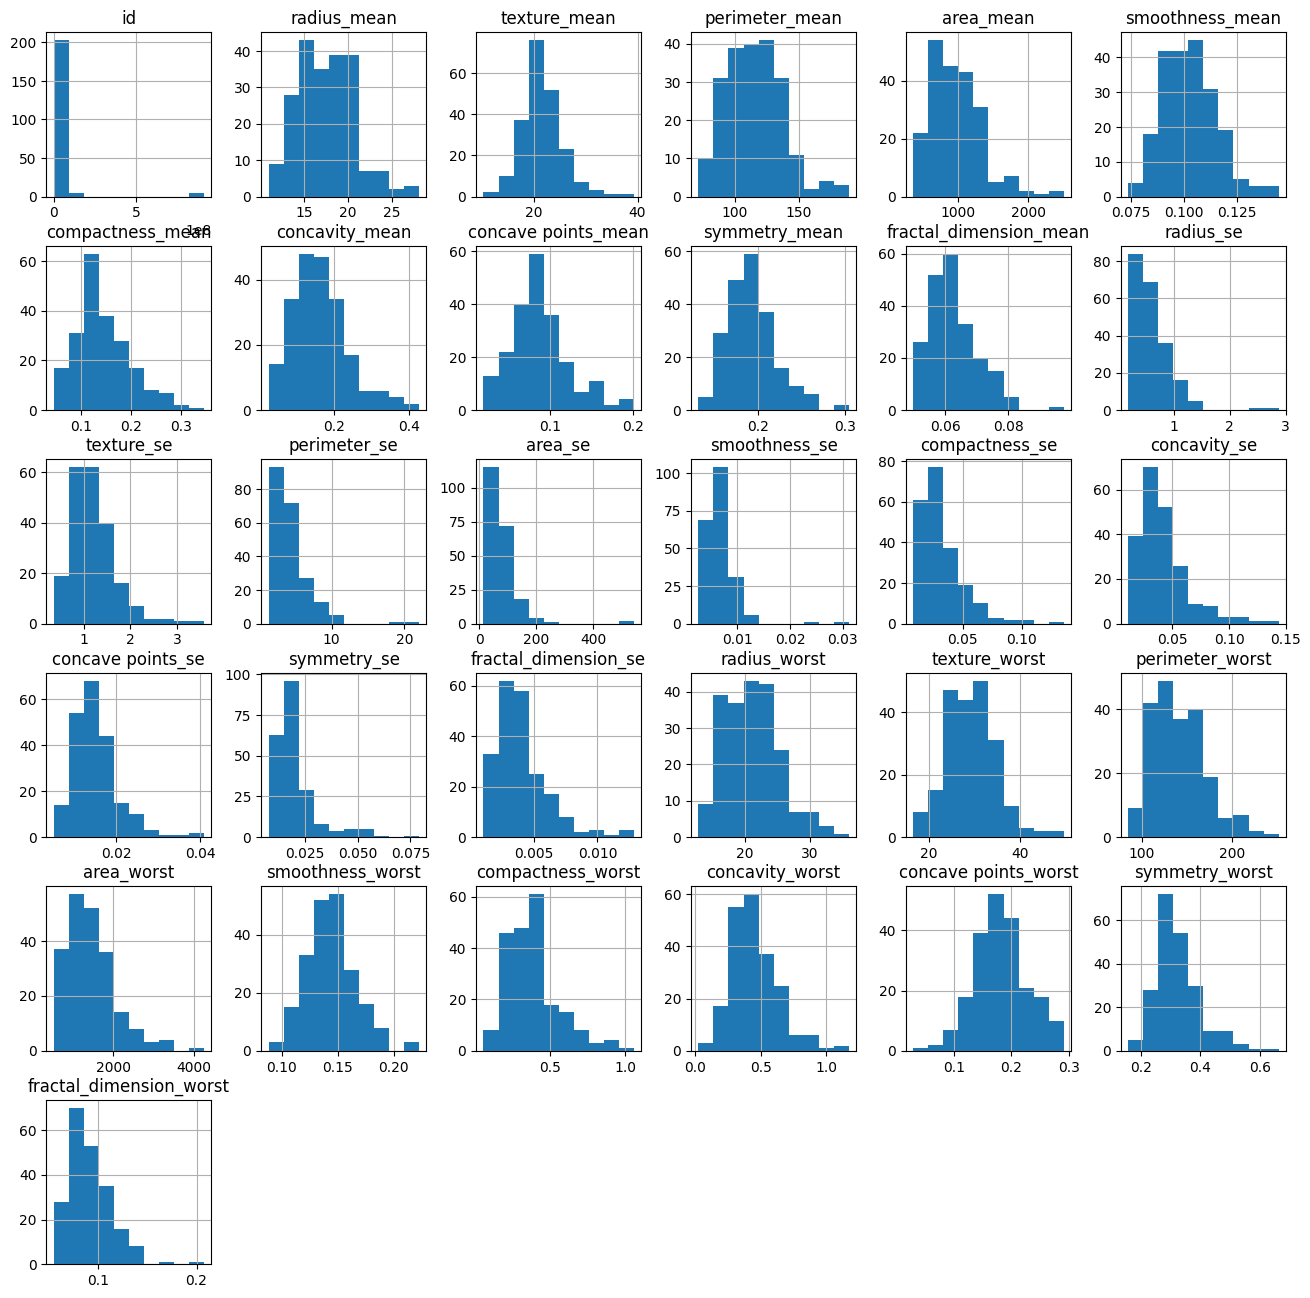

In [7]:
cancer_dataset.groupby('diagnosis').hist(figsize=(16,16))

4. Converting cateogircal or text data to numerical values

In [8]:
# Using the label encoder to label categorical data
# M = 1 and B = 0

from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5. Splitting and feature scaling of data

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1)

In [10]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

 ***Applying Unsupervised Learning - Classification Algorithms {B = Benign, M = Malign}***

**Models**

*****

(I) Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[86  3]
 [ 2 52]]
0.965034965034965


*Logistic regression predicts with an accuracy of 96.5%*

(II) KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[88  6]
 [ 0 49]]
0.958041958041958


*KNN alogrithm predicts with an accuracy of 95.8%*

(III) Decision Tree Algorithm

In [18]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[85  5]
 [ 3 50]]
0.9440559440559441


*Decision Tree Algorithm predicts an accuracy of 94.44%*

(IV) Random Forest Classification

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[86  4]
 [ 2 51]]
0.958041958041958


*Random Forest Classifier predicts an accuracy of 95.80%*

(V) Naive Bayes Algorithm

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[84  5]
 [ 4 50]]
0.9370629370629371


*Naive Bayes Algorithm predicts an accuracy of 93.70%*

(VI) Support Vector Machine

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_pred, Y_test)
print(cm)

# Accuracy
accuracy = (cm[0][0]+cm[1][1])/cm.sum()
print(accuracy)

[[85  3]
 [ 3 52]]
0.958041958041958


*Support Vector Machine Algorithm predicts an accuracy of 95.80%*